In this demo we will go trough some useful R functions which can be used to visualize (complex) data. considering the importance of this aspect we will put particular emphasis on distribution

## Data

 * Iris Data: measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica
 * Wines: the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines
 * rnaseq: 12 plant samples belonging to two classes
 * NIR: A data set with NIR spectra and octane numbers of 60 gasoline samples. The NIR spectra were measured using diffuse reflectance as log(1/R) from 900 nm to 1700 nm in 2 nm intervals, giving 401 wavelengths. 

## Loading the data
 
Some of the dataset are distributed as part of R packages, others have to be explicitly loaded from file. In this second case, we are providing them as .RData files.

In [1]:
## load the library 
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
## load the data provided by R itself
data(iris)

## load the data from the disk (remember to set the correct working directory)
load("data/NIR.RData")
load("data/rnaseq.RData")
load("data/wines.RData")


Now some new object should be present in the "Environment" of R. To see what R actually has in the memory look to the "Environment" tab of RStudio or issue `ls` on the console

In [3]:
ls()

[1] "counts"   "countsn"  "gasoline" "iris"     "vintages" "wines"

The previous output shows the "objects" containing the data. Some of the names are self explanatory, while `counts` and `countsn` are the normalized/non normalized counts per read of the rnaseq experiment, `vintages` contains the class of the wines samples, `gasoline` is the object containing the NIR data.

## The Iris Dataset
I start showing you some basic plots on the `iris` dataset. 
First of all let's look to the number of variables and the number of samples

In [4]:
## print the dimensions of the data matrix
dim(iris)

[1] 150   5

So the dataset contains five variables over 150 samples

In [5]:
## show the "head" of the data matrix
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
## show the variable names ...
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

Apparently we have 4 physical characteristics and 1 variable which identify the class of the samples. When the number of variables is low, it is interesting to get a textual summary of the characteristics of my data. This task is performed by the `summary` function

In [7]:
## print a summary of my data
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

The `summary` function prints some important **statistics** for the numeric variables and a table for the factor. What can we learn from these numbers?

* **Variable Scale**: minimum and maximum values gives us a feeling on the "size" of the different variables. Here we know that we are speaking of physical measures in centimeters, so we expect comparable scales.
* **Normality**: If the mean and the median are almost equal, this is a good indication that the variable under consideration has a symmetric distribution around the mean. This is not a very good test for normality, however. We will see how `qqnorm` can be used for that

We are already wxpert in using ggplot and pipes to visualize tabular data ... so

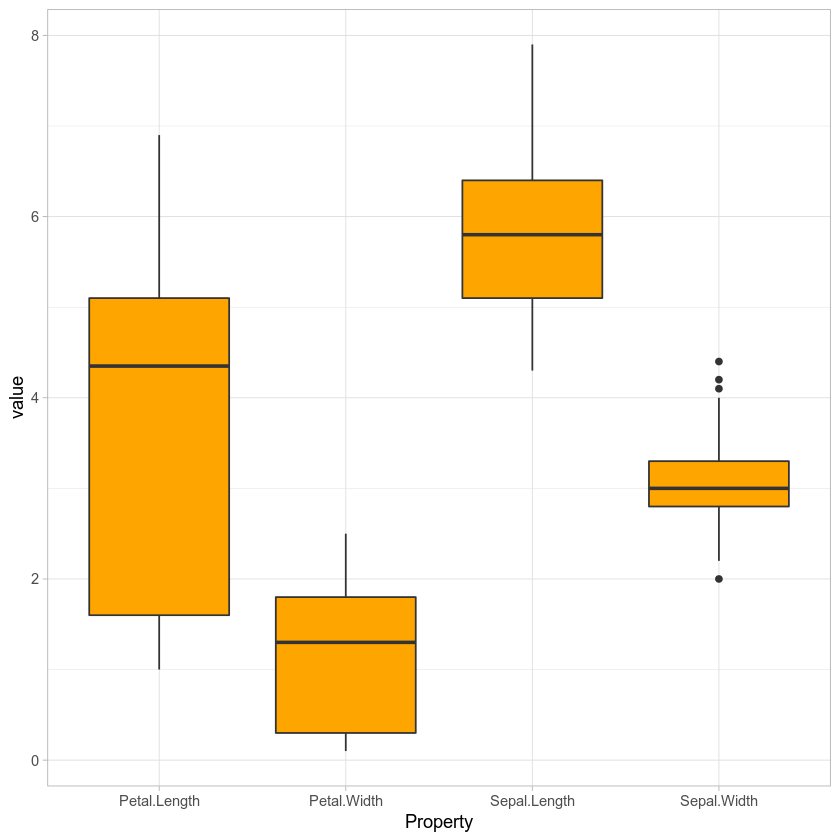

In [8]:
## boxplot
iris  %>% 
    pivot_longer(Sepal.Length:Petal.Width, names_to = "Property", values_to = "value") %>% 
    ggplot() + 
    geom_boxplot(aes(x = Property, y = value), fill = "orange") + 
    theme_light()


As I stressed in the class boxplots are nice if the number of samples is big and if the data are not characterized by confounding factors. For this reason it is important also to look to the "real" data points

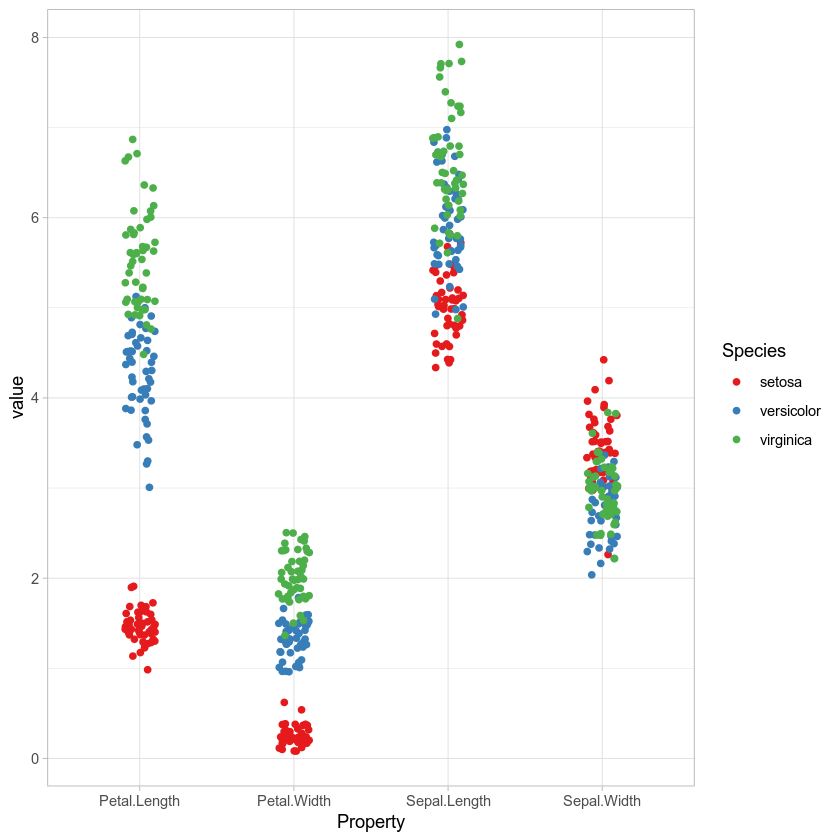

In [13]:
## boxplot
iris  %>% 
    pivot_longer(Sepal.Length:Petal.Width, names_to = "Property", values_to = "value") %>% 
    ggplot() + 
    geom_jitter(aes(x = Property, y = value, col = Species), width = 0.1) + 
    scale_color_brewer(palette = "Set1") +   ## this is a way to override the unpleasent default colors of ggplot
    theme_light()


The picture looks more intriguing than before ... 

* Petal.Length was asymmetric because there are sub populations!
* The same is true for Petal.Width
* The other the variables look less strange ...

Some of these facts are not unexpected since our dataset is made up of three different iris species ...
To see this we should include the specie information in the previous plots. 

This plot clearly shows that `Petal.Length` is actually a bio-marker which differentiates the three varieties ... in this sense, then, what I'm doing now it is not optimal ... or not? What do you think?

### Variable distribution

I now use the qq-plot to check if the distribution of my data is compatible with the normal. This graphical approach allows you to plot the sample quantiles against the one of a normal distribution. In presence of perfect agreement, the points should stay on the theoretical line

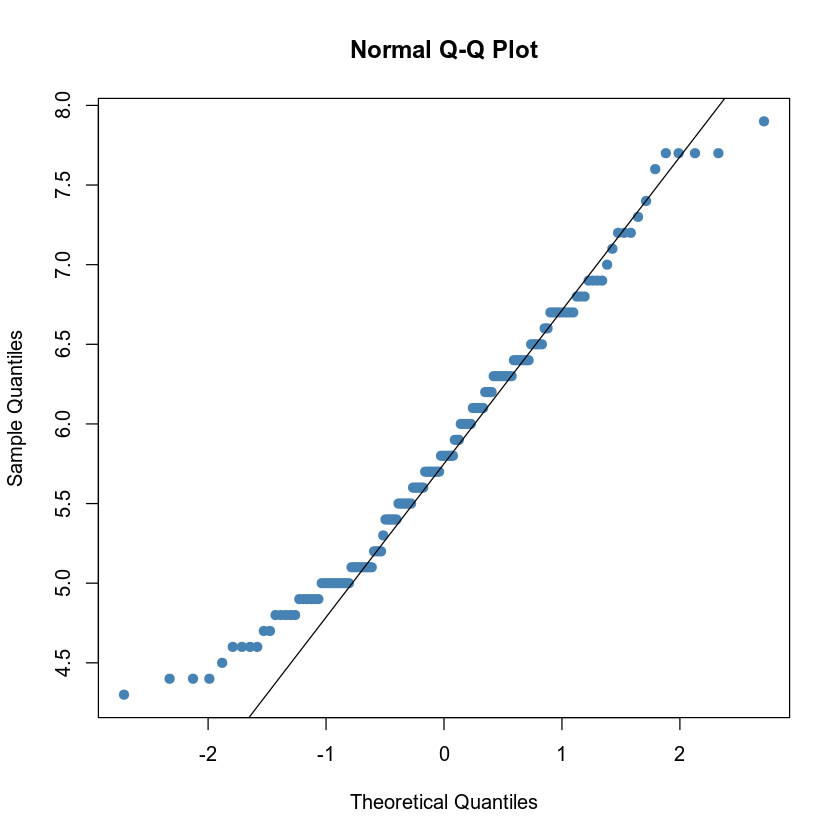

In [16]:
## plot the quantiles of the data gainst the theoretical quantiles of a normal distribution    
qqnorm(iris$Sepal.Length, pch = 19, col = "steelblue")  

## add the line to show the normal behavior 
qqline(iris$Sepal.Length)

As you see the data distribution does not really agree with a normal one. But remember that the samples are in fact the sum of three species, so normality is not an expected result.

qqplots are better that histograms to compare distributions (they can be used also to compare the data against other theoretical distributions or against other data)

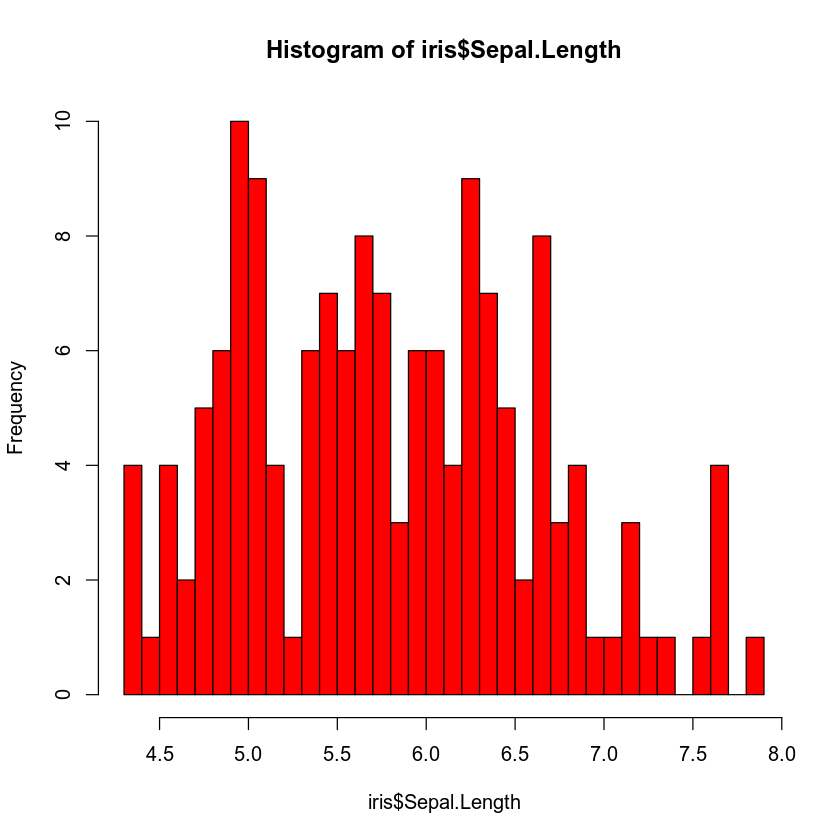

In [17]:
hist(iris$Sepal.Length, col = "red", breaks = 30)

The histogram suggests that the distribution has a shoulder on the right, but from this plot it is hard to draw conclusions on actual distribution of the data.

Before moving to another dataset, I would like to show you the first sort of "multivariate" plot which can be used to assess the relations among couples of variables. As we will see, highlighting the relations among the variables is the central idea behind multivariate methods. This specific plot is produced by R with the function `pairs`, it is important to remember that it is formative if your dataset contains a limited number of variables. The reason for that will be immediately clear when you look to the output.

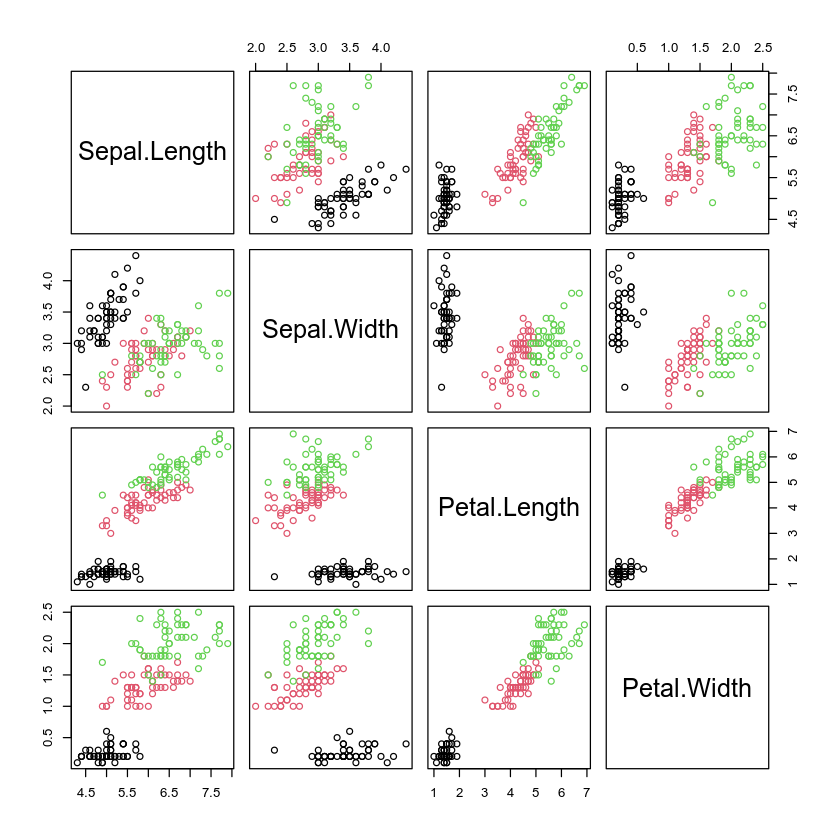

In [18]:
pairs(iris[,1:4],                          ## consider only the numeric variables
      col = as.numeric(iris$Species))      ## transform the specie factor to a number ... which will be used as color

If you are interested in making the plot prettier, here some hints

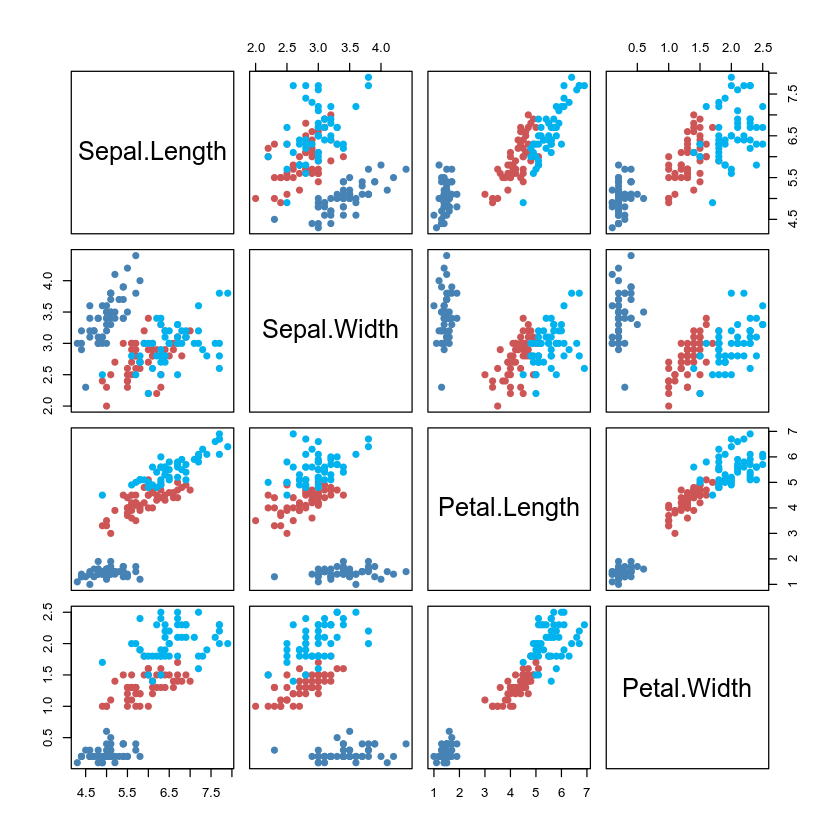

In [21]:
mycol <- c("steelblue","indianred3", "deepskyblue2")


pairs(iris[,1:4],                          
      col = mycol[as.numeric(iris$Species)],
      pch = 19)


## How I did it: I created a vector with three colors I like. Then pick up the right color from that vector 
## on the base of the iris specie. To do that I need to transform the factor (the iris specie) to a number
## with the as.numeric() function


In [22]:
## this is how the color vector looks like
mycol[as.numeric(iris$Species)]

[1] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
  [6] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [11] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [16] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [21] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [26] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [31] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [36] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [41] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [46] "steelblue"    "steelblue"    "steelblue"    "steelblue"    "steelblue"   
 [51] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [56] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [61] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [66] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [71] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [76] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [81] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [86] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [91] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
 [96] "indianred3"   "indianred3"   "indianred3"   "indianred3"   "indianred3"  
[101] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[106] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[111] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[116] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[121] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[126] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[131] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[136] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[141] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"
[146] "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2" "deepskyblue2"

This plot immediately give us the feeling of the power of multivariate statistics. 

**Questions**

* Which variable do you expect will be correlated?
* Which varieties are easier to separate? Why?
* ...

## The NIR Dataset
The NIR dataset contains infrared spectra (NIR stands for something like Near Infra Red). In our space we see an object called nirs, suppose that we do not have any idea of its content. To tackle this issue we can use the function `str`

In [23]:
str(gasoline)

'data.frame':	60 obs. of  2 variables:
 $ octane: num  85.3 85.2 88.5 83.4 87.9 ...
 $ NIR   : 'AsIs' num [1:60, 1:401] -0.0502 -0.0442 -0.0469 -0.0467 -0.0509 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:60] "1" "2" "3" "4" ...
  .. ..$ : chr [1:401] "900 nm" "902 nm" "904 nm" "906 nm" ...


The command shows that the `gasoline` object is a data.frame (you can thing of this type of object as an Excel table), which contains two variables. One with the number of octanes, the second which is a matrix of 60 samples and 401 variables.

In this case the use of things like `head` or `summary` is discouraged, mainly because it is difficult to handle 401 text summaries. To check the quality (and the content) of the data is better to plot the experimental spectra.

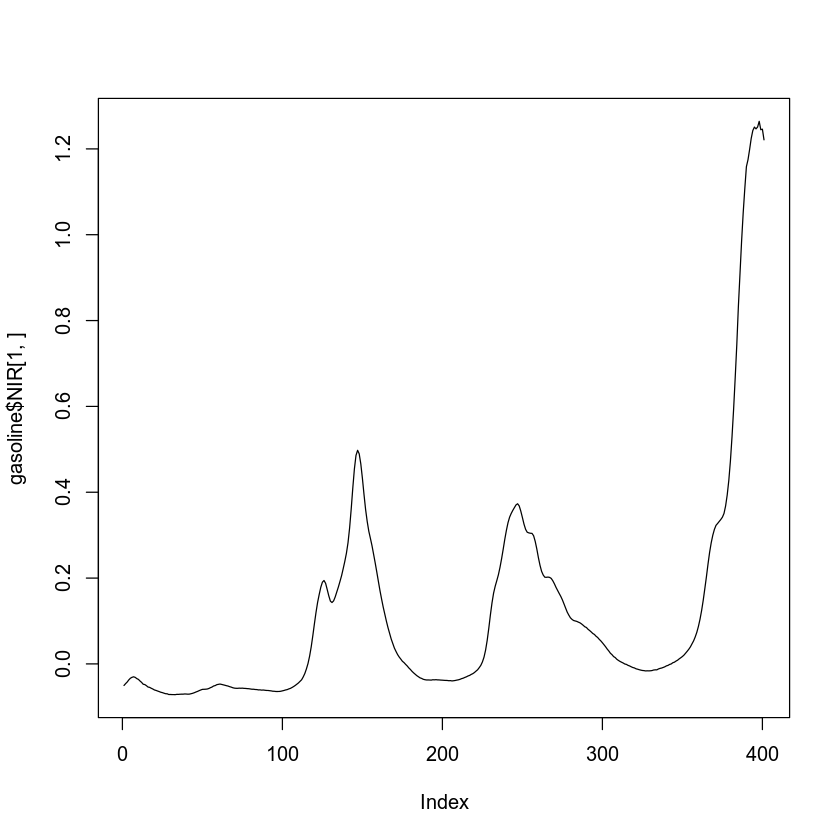

In [24]:
## one spectrum
plot(gasoline$NIR[1,],      ## plot the first line of the NIR table
     type = "l")            ## with a line



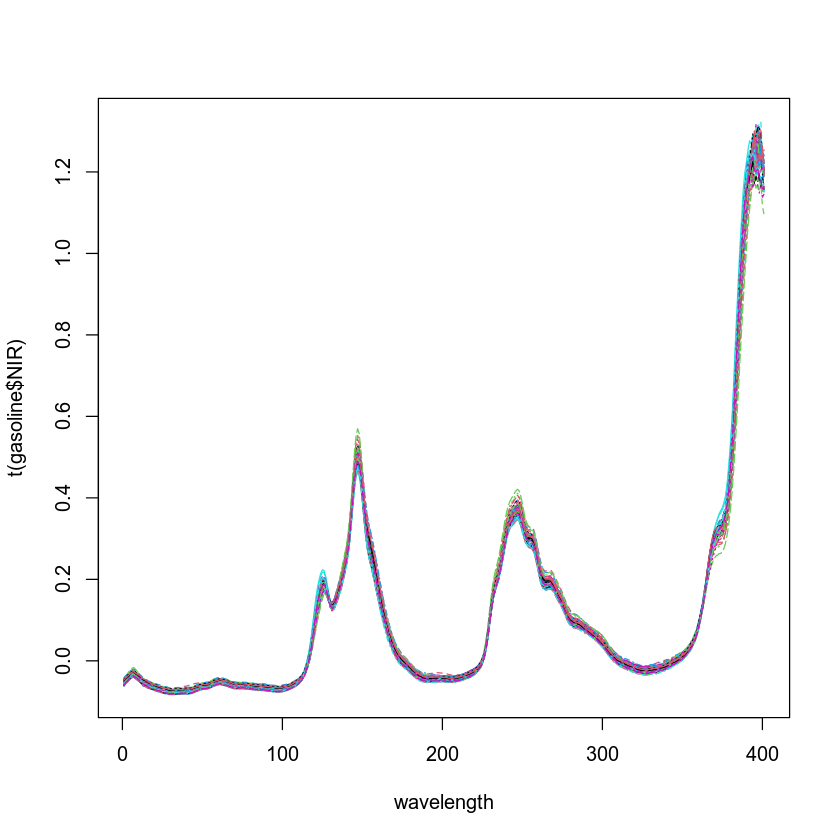

In [25]:
## The overall dataset
matplot(t(gasoline$NIR), ## here the t() transposes the matrix because the matplot function is designed to plot by columns
        type = "l",
        xlab = "wavelength") ## add also the x axis label




The data look fairly comparable, what we see is that there is a strong intensity difference between the high intensity wavelengths (like 390) and the "low intensity" regions, like 50.

To mitigate this effect log transformation can be helpful. Unfortunately we have here negative numbers! A workaround can be to shift the signal up to something slightly bigger than zero ...


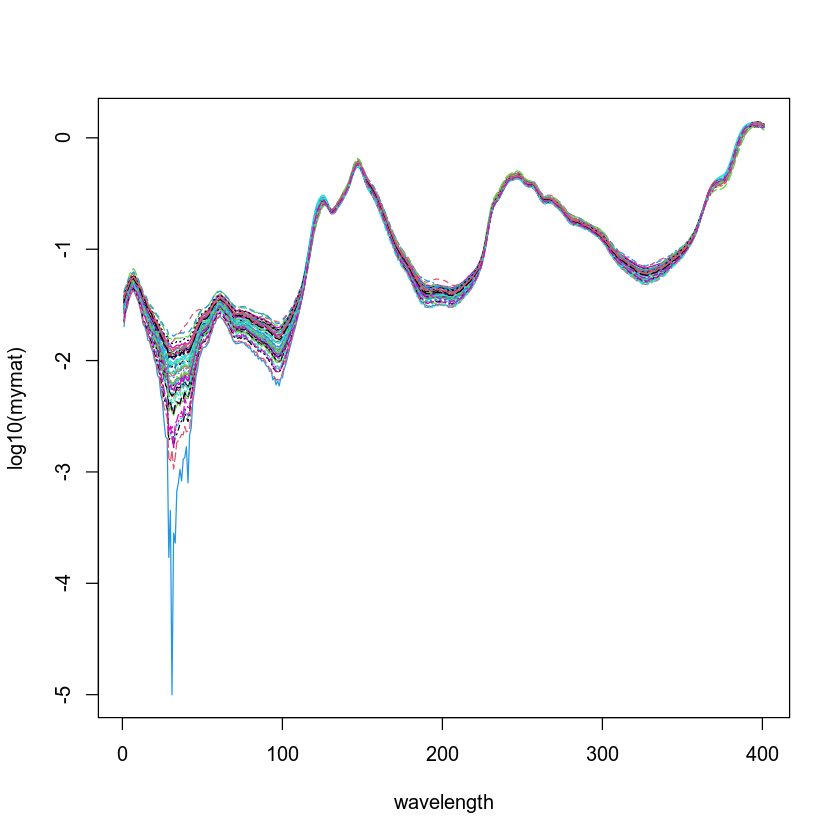

In [26]:
## The overall dataset

mymat <- t(gasoline$NIR) - min(gasoline$NIR) + 0.00001

matplot(log10(mymat), ## here the t() transposes the matrix because the matplot function is designed to plot by columns
        type = "l",
        xlab = "wavelength") ## add also the x axis label


Now the plot is more interesting. Note that the variability is bigger on low intensity areas. 

**Questions**

* Is this what you would expect? Why?
* Would it be safe to scale the values and make the low intensity variables important as the high intensity ones?
* ...

## Its your turn ...
Play around and visualize rnaseq and the wine dataset!



In [ ]:
library(tidyverse)

winedf <- data.frame(wines, vintages)

winedf %>% ggplot() +
  geom_jitter(aes(x = vintages, y = proline, col = vintages), width = 0.1) + theme_light()

In [ ]:
winedf %>% 
  gather(compound, I, -vintages) %>% 
  ggplot() +
  geom_jitter(aes(x = vintages, y = I, col = vintages), 
              width = 0.1) + 
  facet_wrap(~compound, scales = "free", ncol = 2) + 
  theme_light()
  

In [ ]:
summary(wines)

In [ ]:
qqnorm(winedf$proline, col = winedf$vintages)  
qqline(winedf$proline)